## Introdução

Este projeto foi desenvolvido como parte de um processo seletivo para a entidade Green Team, com o objetivo de analisar dados de vendas de um varejo online nos Estados Unidos.

Durante a análise, utilizei Python com bibliotecas como pandas, matplotlib e seaborn para explorar os dados e gerar visualizações. Estou em processo de aprendizagem da linguagem e busquei aplicar os conceitos estudados nas aulas e em cursos complementares.

A análise visa responder perguntas como:
- Qual o perfil dos clientes mais frequentes?
- Quais produtos ou subcategorias vendem mais?
- Quais trazem mais lucro?
- Formas de pagamento ou entrega influenciam no lucro ou nas devoluções?

A seguir, apresento cada etapa com gráficos, códigos e comentários explicativos.

# Etapa 1 – Configuração do Ambiente

Para começar a análise, importei as bibliotecas principais do Python para leitura, análise e visualização de dados:

- **pandas**: para trabalhar com tabelas e dados.
- **matplotlib.pyplot** e **seaborn**: para fazer os gráficos.
- **numpy**: para ajudar em operações numéricas, se necessário.

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Etapa 2 – Carregamento dos Dados

Aqui, carreguei os dados que estavam no arquivo CSV `vendas_supermercado.csv`.  
Depois, usei `head()` para visualizar as primeiras linhas e entender a estrutura da tabela.

In [96]:
df = pd.read_csv("vendas_supermercado.csv")
df.head()

,Unnamed: 0,CODIGO_PEDIDO,DATA_PEDIDO,DATA_ENTREGA,FORMA_ENTREGA,CODIGO_CLIENTE,NOME_CLIENTE,SEGMENTO_CLIENTE,PAIS,CIDADE,...,REGIAO,CODIGO_PRODUTO,CATEGORIA_PRODUTO,SUB_CATEGORIA_PRODUTO,NOME_PRODUTO,VALOR_PRODUTO,QUANTIDADE,LUCRO,DEVOLUCAO,MODO_PAGAMENTO
0,0,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1.0,28.2668,No,Online
1,1,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3.0,38.2668,No,Online
2,2,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2.0,67.2742,No,Cards
3,3,CA-2019-125206,2019-01-03,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2.0,28.6150,No,Online
4,4,US-2019-116365,2019-01-03,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2.0,-5.2640,No,Online


# Etapa 3 – Exploração Inicial

Antes de fazer qualquer análise, é importante entender:
- Quantas linhas e colunas o dataset tem.
- Quais tipos de dados existem.
- Se há dados faltantes (valores nulos).

Isso ajuda a planejar a limpeza dos dados depois.

In [97]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5901 non-null   int64  
 1   CODIGO_PEDIDO          5901 non-null   object 
 2   DATA_PEDIDO            5901 non-null   object 
 3   DATA_ENTREGA           5801 non-null   object 
 4   FORMA_ENTREGA          5801 non-null   object 
 5   CODIGO_CLIENTE         5801 non-null   object 
 6   NOME_CLIENTE           5801 non-null   object 
 7   SEGMENTO_CLIENTE       5801 non-null   object 
 8   PAIS                   5801 non-null   object 
 9   CIDADE                 5801 non-null   object 
 10  ESTADO                 5801 non-null   object 
 11  REGIAO                 5801 non-null   object 
 12  CODIGO_PRODUTO         5801 non-null   object 
 13  CATEGORIA_PRODUTO      5801 non-null   object 
 14  SUB_CATEGORIA_PRODUTO  5801 non-null   object 
 15  NOME

,0
Unnamed: 0,0
CODIGO_PEDIDO,0
DATA_PEDIDO,0
DATA_ENTREGA,100
FORMA_ENTREGA,100
CODIGO_CLIENTE,100
NOME_CLIENTE,100
SEGMENTO_CLIENTE,100
PAIS,100
CIDADE,100


# Etapa 4 – Limpeza e Pré-Processamento

Aqui fiz alguns ajustes para deixar os dados prontos para análise:
- Removi a coluna "Unnamed: 0", que não era útil.
- Converti as colunas de datas para o formato de data do Python.
- Removi as linhas que tinham valores faltando.

In [98]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df["DATA_PEDIDO"] = pd.to_datetime(df["DATA_PEDIDO"])
df["DATA_ENTREGA"] = pd.to_datetime(df["DATA_ENTREGA"])
df.dropna(inplace=True)

# Etapa 5 – Perfil dos Clientes

Nesta etapa, analisei os segmentos de clientes (Consumer, Corporate, Home Office) para entender qual tipo de cliente realiza mais pedidos.

Usei um gráfico de barras para visualizar a distribuição.

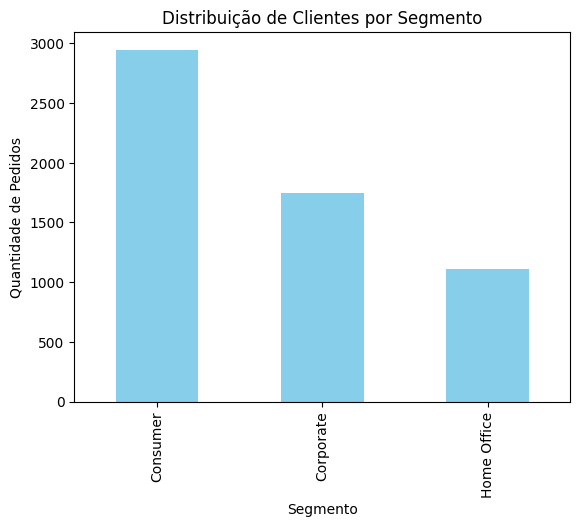

In [99]:
# Distribuição por segmento
df["SEGMENTO_CLIENTE"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribuição de Clientes por Segmento")
plt.xlabel("Segmento")
plt.ylabel("Quantidade de Pedidos")
plt.show()

# Etapa 6 – Produtos Mais Vendidos

Aqui, mostrei as 10 subcategorias de produtos mais vendidas.  
Isso ajuda a entender o que mais sai no varejo.

Usei um gráfico horizontal de barras.

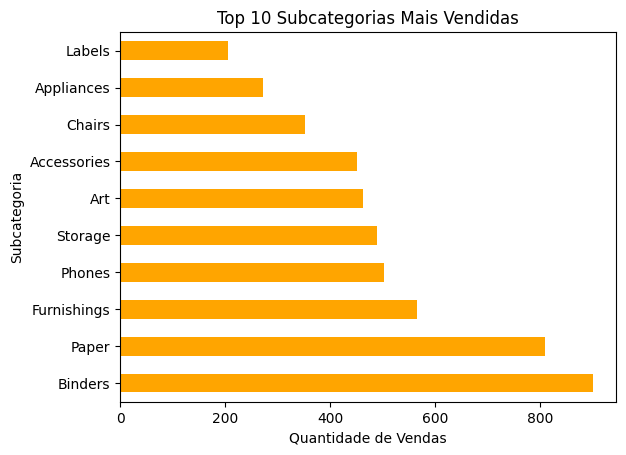

In [100]:
df["SUB_CATEGORIA_PRODUTO"].value_counts().head(10).plot(kind="barh", color="orange")
plt.title("Top 10 Subcategorias Mais Vendidas")
plt.xlabel("Quantidade de Vendas")
plt.ylabel("Subcategoria")
plt.show()

## Etapa 6.1 – Produtos mais comprados por tipo de cliente

Além de saber quais subcategorias vendem mais, é interessante cruzar essa informação com os segmentos de cliente.

Aqui, analisei quais subcategorias são mais compradas por cada tipo de cliente (Consumer, Corporate e Home Office).

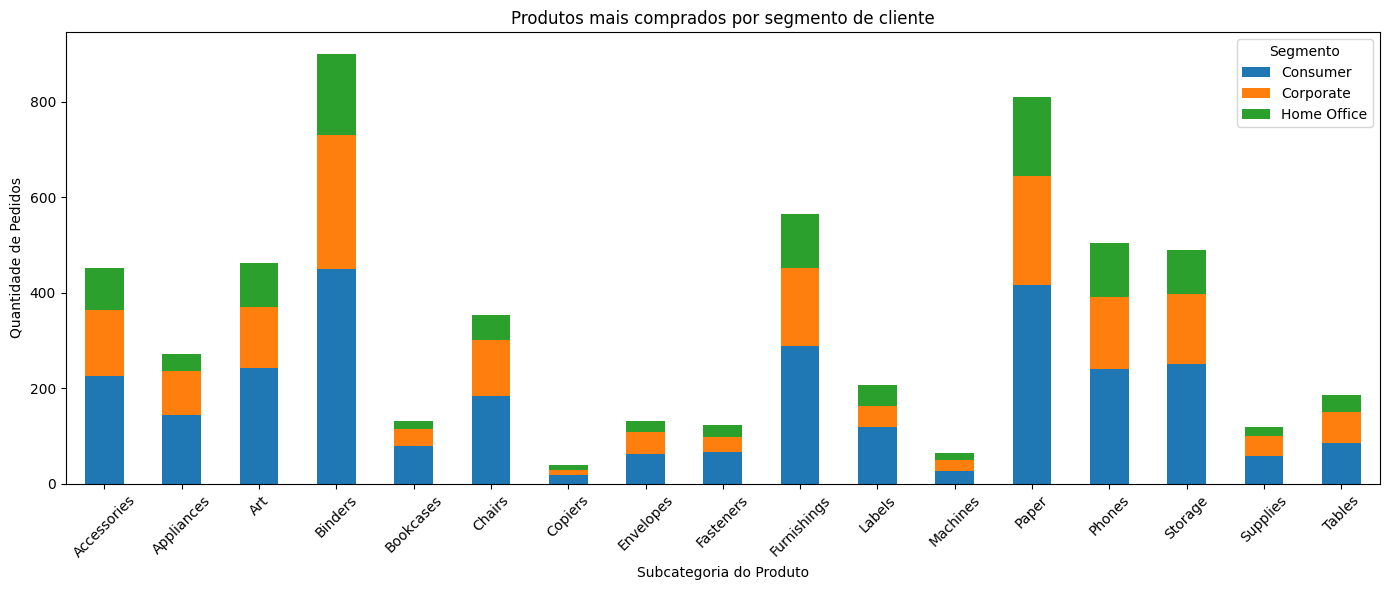

In [101]:
produtos_por_segmento = df.groupby(['SEGMENTO_CLIENTE', 'SUB_CATEGORIA_PRODUTO']).size().unstack().fillna(0)

produtos_por_segmento.T.plot(kind='bar', figsize=(14, 6), stacked=True)

plt.title('Produtos mais comprados por segmento de cliente')
plt.xlabel('Subcategoria do Produto')
plt.ylabel('Quantidade de Pedidos')
plt.xticks(rotation=45)
plt.legend(title='Segmento')
plt.tight_layout()
plt.show()

## Etapa 6.2 – Subcategorias com Maior Lucro

Enquanto a etapa anterior mostrou quais subcategorias são mais vendidas em quantidade, aqui eu analisei quais trazem mais lucro total para a empresa.

Mesmo com menos vendas, algumas subcategorias geram lucros maiores por unidade vendida. Um bom exemplo disso são os "Copiers", que aparecem como a subcategoria mais lucrativa, mesmo não estando entre as mais vendidas.

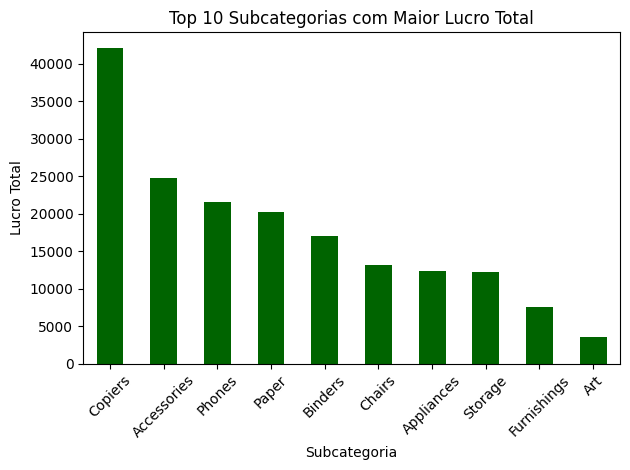

In [102]:
df.groupby("SUB_CATEGORIA_PRODUTO")["LUCRO"].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='darkgreen')
plt.title("Top 10 Subcategorias com Maior Lucro Total")
plt.xlabel("Subcategoria")
plt.ylabel("Lucro Total")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Etapa 7 – Lucro por Categoria e Região

Aqui, analisei quais categorias de produtos geram mais lucro no geral e também como esse lucro varia entre as regiões dos EUA.

Essas informações ajudam a empresa a saber onde vale mais a pena investir.

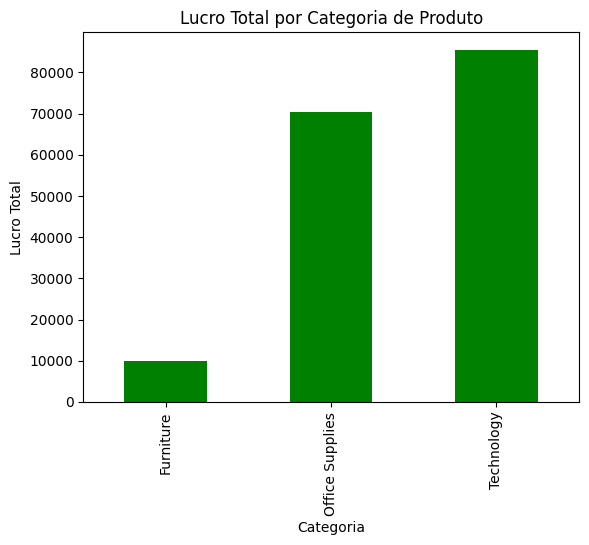

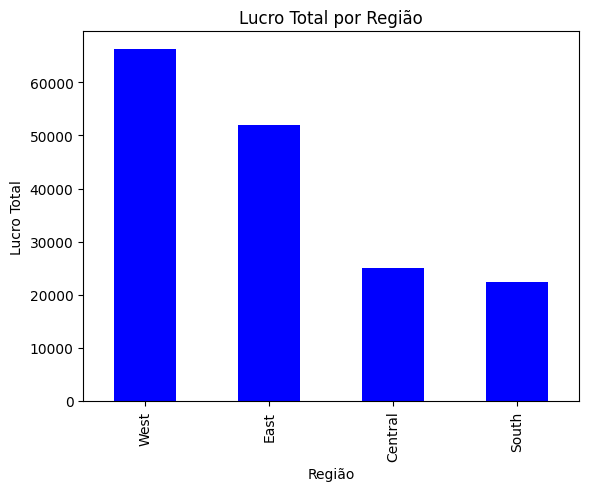

In [103]:
df.groupby("CATEGORIA_PRODUTO")["LUCRO"].sum().sort_values().plot(kind="bar", color="green")
plt.title("Lucro Total por Categoria de Produto")
plt.xlabel("Categoria")
plt.ylabel("Lucro Total")
plt.show()

df.groupby("REGIAO")["LUCRO"].sum().sort_values(ascending=False).plot(kind="bar", color="blue")
plt.title("Lucro Total por Região")
plt.xlabel("Região")
plt.ylabel("Lucro Total")
plt.show()

# Etapa 8 – Devoluções por Forma de Entrega e Pagamento

Aqui, investiguei se o tipo de entrega ou a forma de pagamento influencia na quantidade de devoluções feitas pelos clientes.

Isso pode indicar problemas logísticos ou operacionais.

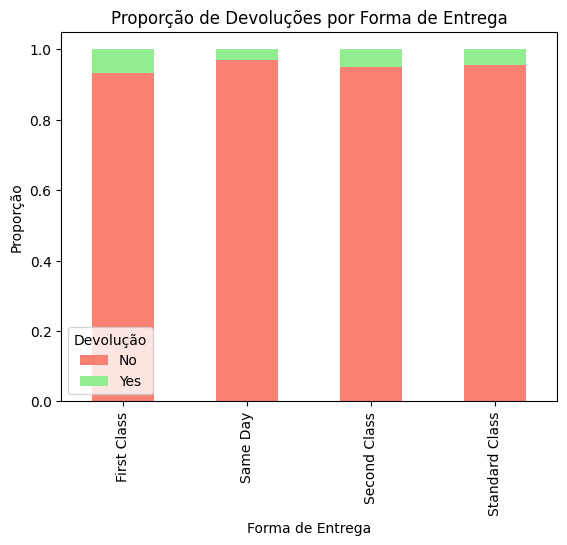

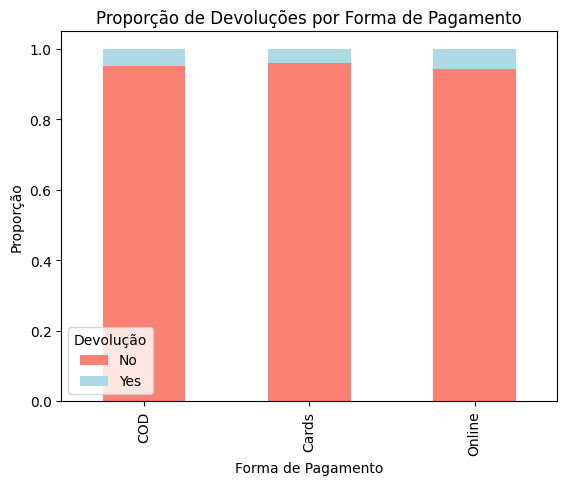

In [104]:
df.groupby("FORMA_ENTREGA")["DEVOLUCAO"].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True, color=["salmon", "lightgreen"])
plt.title("Proporção de Devoluções por Forma de Entrega")
plt.xlabel("Forma de Entrega")
plt.ylabel("Proporção")
plt.legend(title="Devolução")
plt.show()

df.groupby("MODO_PAGAMENTO")["DEVOLUCAO"].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True, color=["salmon", "lightblue"])
plt.title("Proporção de Devoluções por Forma de Pagamento")
plt.xlabel("Forma de Pagamento")
plt.ylabel("Proporção")
plt.legend(title="Devolução")
plt.show()

# Etapa 9 – Lucro por Forma de Pagamento e Segmento de Cliente

Nesta parte, analisei qual forma de pagamento gera mais lucro em média, e também qual segmento de cliente traz mais lucro para a empresa.

Isso ajuda a entender onde estão os melhores retornos financeiros.

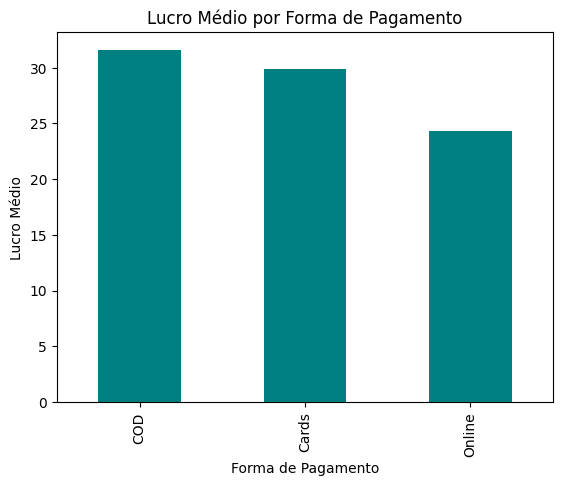

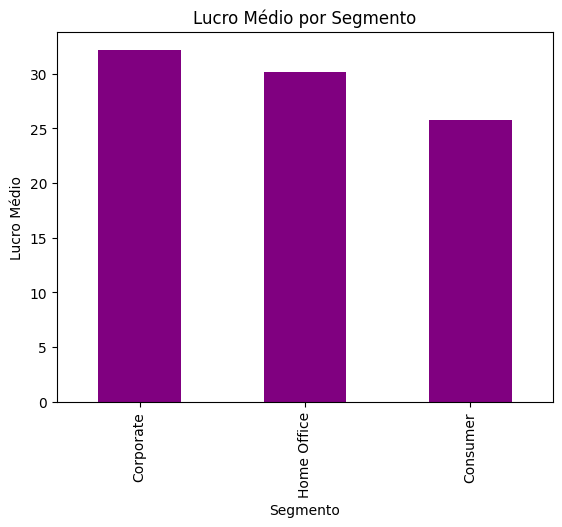

In [105]:
df.groupby("MODO_PAGAMENTO")["LUCRO"].mean().sort_values(ascending=False).plot(kind="bar", color="teal")
plt.title("Lucro Médio por Forma de Pagamento")
plt.xlabel("Forma de Pagamento")
plt.ylabel("Lucro Médio")
plt.show()

df.groupby("SEGMENTO_CLIENTE")["LUCRO"].mean().sort_values(ascending=False).plot(kind="bar", color="purple")
plt.title("Lucro Médio por Segmento")
plt.xlabel("Segmento")
plt.ylabel("Lucro Médio")
plt.show()

# Etapa 10 – Análise Temporal e Sazonalidade

Para entender se há picos ou quedas de vendas ao longo do ano, observei a quantidade de pedidos por mês.

Isso pode ajudar em campanhas promocionais e controle de estoque.

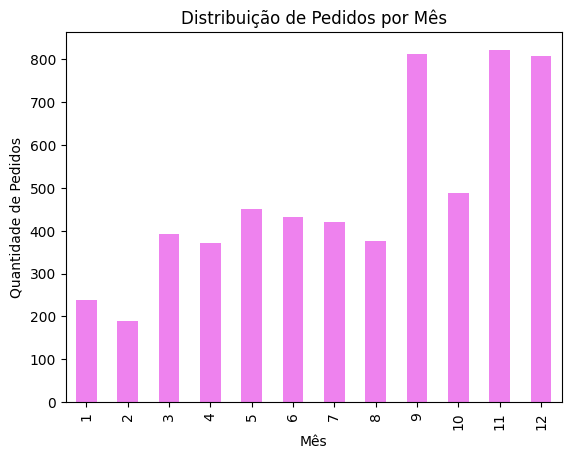

In [106]:
df["MES"] = df["DATA_PEDIDO"].dt.month
df["MES"].value_counts().sort_index().plot(kind="bar", color="violet")
plt.title("Distribuição de Pedidos por Mês")
plt.xlabel("Mês")
plt.ylabel("Quantidade de Pedidos")
plt.show()

# Etapa 11 – Correlação entre Variáveis

Aqui, gerei um mapa de calor para verificar a relação entre lucro, valor do pedido e quantidade de produtos.

Isso ajuda a entender se pedidos maiores trazem mais lucro ou não.

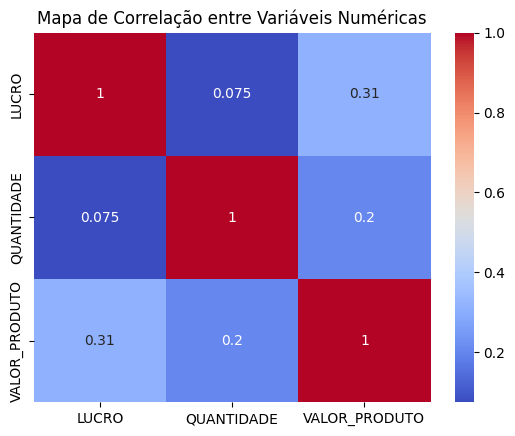

In [107]:
sns.heatmap(df[["LUCRO", "QUANTIDADE", "VALOR_PRODUTO"]].corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de Correlação entre Variáveis Numéricas")
plt.show()

## Conclusão

A análise permitiu identificar que o segmento de clientes mais ativo é o Consumer, com preferência por produtos como Binders e Paper. No entanto, subcategorias como Copiers, mesmo com menor volume de vendas, geram o maior lucro, indicando oportunidades de foco estratégico.

Também foi possível observar variações de lucro por região, sendo o Oeste a mais lucrativa, e entender como formas de entrega e pagamento podem afetar a taxa de devoluções e o desempenho financeiro.

Esse projeto foi uma oportunidade valiosa para aplicar os conhecimentos que venho desenvolvendo em Python e análise de dados. Embora ainda esteja aprendendo, busquei conduzir cada etapa com atenção, raciocínio e coerência com os objetivos propostos.

Me coloco à disposição para explicar todas as decisões tomadas ao longo do projeto.